R² Score: -11.252468343750815
Mean Squared Error: 76.5779271484426
Intercept: 11.567901240452557

Coefficients:
        Coefficient
Height    32.835336
Age        0.317295
Gender   -14.623118


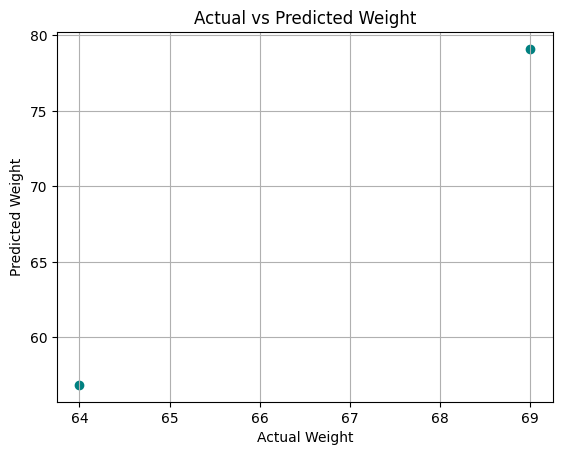

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#reate the dataset from your image
data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Female', 'Female', 'Female', 'Female']
}

df = pd.DataFrame(data)

#Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

#Define features and label
X = df[['Height', 'Age', 'Gender']]
y = df['Weight']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"]))

#Visualization
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.grid(True)
plt.show()